<div style="display: top; background-image:url('https://d1.awsstatic.com/SageMaker/SageMaker%20reInvent%202020/ImgHead_Mohave.3b1df33baa5f71b53237bfa6911fb3adc4902c0e.png');background-position: center ;background-repeat: no-repeat;background-size: 100%; padding-top:20px;">
<div style="color:#FFFFFF; text-align: top;padding-bottom: 25px; padding-left: 15px"><h1 style="font-weight: 900;">Pruning Decision Trees</h1>
</div>
</div>
<br>

In this exercise, we will go over some simple pre-pruning methods. These methods will control (limit) the growth of the tree.
1. Max depth
2. Max number of leaf nodes
3. Minimum impurity decrease

In [1]:
# ! pip install -q -U numpy==1.19.5
# ! pip install -q -U matplotlib==3.3.4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Let's create a random dataset that contains three distinct classes below. We will use `make_blobs()` for this.

In [3]:
from sklearn.datasets import make_blobs

n_samples = 1000
random_state = 1
X, y = make_blobs(n_samples=n_samples, cluster_std = 3, random_state=random_state)

Plot the resulting dataset below.

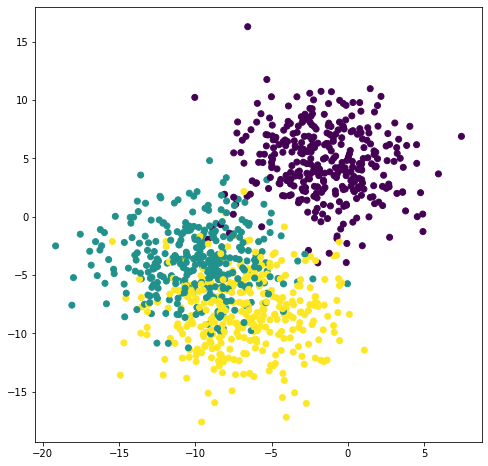

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y); 

Let's build a DecisionTree to separate the three classes.

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Let's invoke a decision tree 
dt = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes=2, min_impurity_decrease =0.1 )

dt.fit(X, y)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.1)

We want to check how well this decision tree works and use it to predict the class.

In [6]:
y_pred = dt.predict(X)

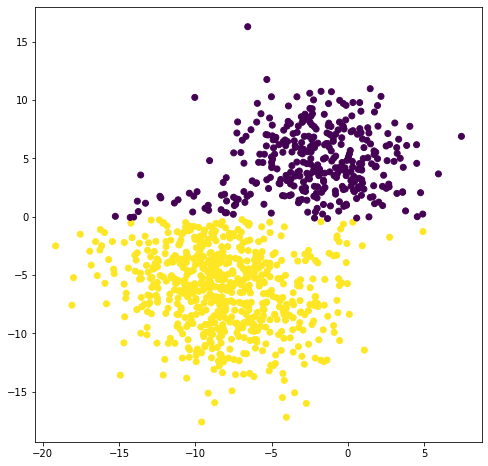

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred);

Clearly this is not classifying all points correctly (see first plot for the true classes). So let's try to modify tree depth, number of leaf nodes and impurity decrease.

### __1. Max depth:__
The tree grows until we reach the max depth limit. Below, we will fit a decision tree with max depth ranging from 1 to 6.

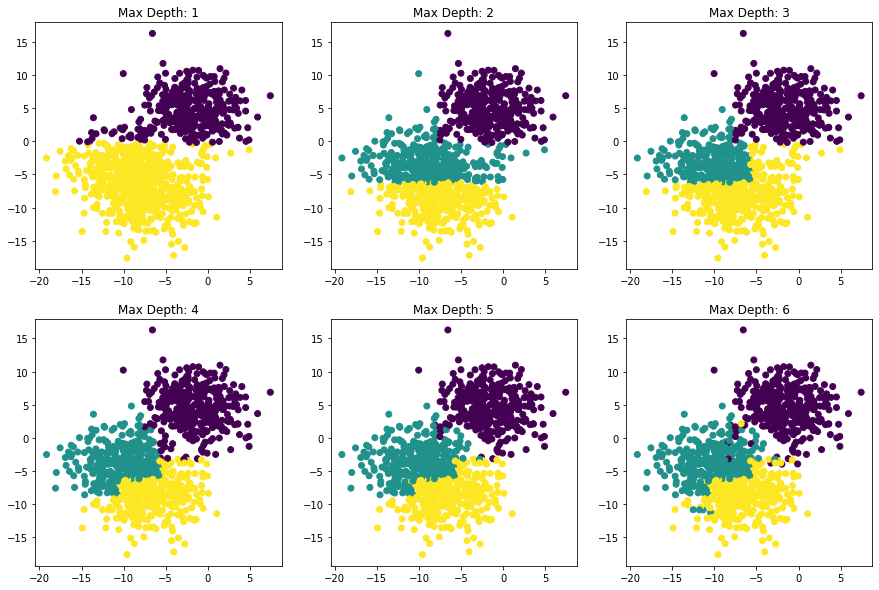

In [8]:
# Plotting function
def plot_depth(d, x, y):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x, y)
    yp = model.predict(x)

    # Plot the results
    plt.scatter(x[:, 0], x[:, 1], c=yp)

# This determines the size of the images
plt.figure(figsize=(15, 10))
# This sets the depth range in a loop
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plot_depth(i + 1, X, y)
    plt.title("Max Depth: {}".format(i + 1))
plt.show()

### __2. Max number of leaf nodes:__
Instead of terminating the creation of new tree nodes with `max_depth` we will now use a max leaf limit. 

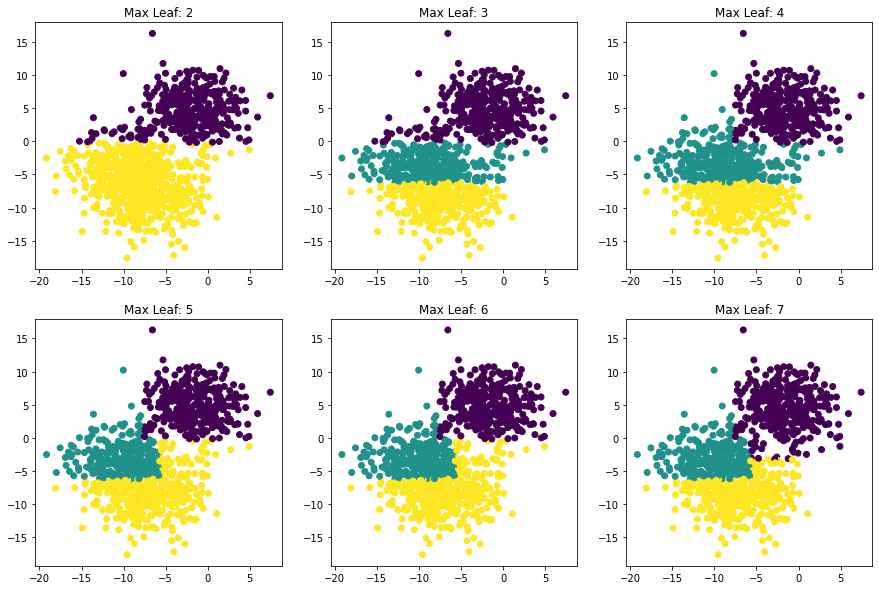

In [9]:
# Plotting function
def plot_leaf(d, x, y):
    model = DecisionTreeClassifier(max_leaf_nodes=d)
    model.fit(x, y)
    yp = model.predict(x)

    # Plot the results
    plt.scatter(x[:, 0], x[:, 1], c=yp)
    

# This determines the size of the images
plt.figure(figsize=(15, 10))
# This sets the depth range in a loop
for i in range(1,7):
    plt.subplot(2, 3, i)
    plot_leaf(i + 1, X, y)
    plt.title("Max Leaf: {}".format(i + 1))
plt.show()

Instead of increasing the max leaves one by one, adjust the plotting function to go in steps of five (e.g. max_leaf_nodes=5, max_leaf_nodes=10, ...).  Start with 5 and look at the plots up to 30.

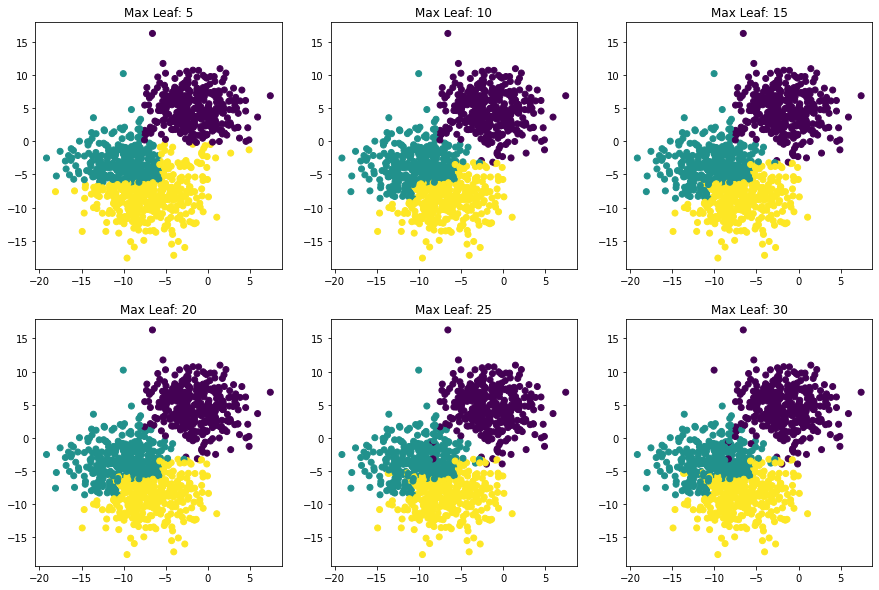

In [10]:
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plot_leaf(5 * (i + 1), X, y)
    plt.title("Max Leaf: {}".format(5 * (i + 1)))
plt.show()

### __3. Min impurity decrease:__
The tree grows if a node induces a decrease of the impurity greater than or equal to this value. Details are [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Sklearn calculates a weighted minimum impurity decrease with this equation:

$$
   \frac{N_{t}}{N}\,\cdot \left(impurity - \frac{N_{t_R}}{N_{t}} \cdot impurity_{R} - \frac{N_{t_L}}{N_{t}} \cdot impurity_{L} \right)
$$


where `N` is the total number of samples, $N_{t}$ is the number of samples at the current node, $N_{t_L}$ is the number of samples in the left child, and $N_{t_R}$ is the number of samples in the right child. 

Create a range of plots and change the `min_impurity_decrease` parameter to check how the threshold for impurity decrease influences the tree predictions.

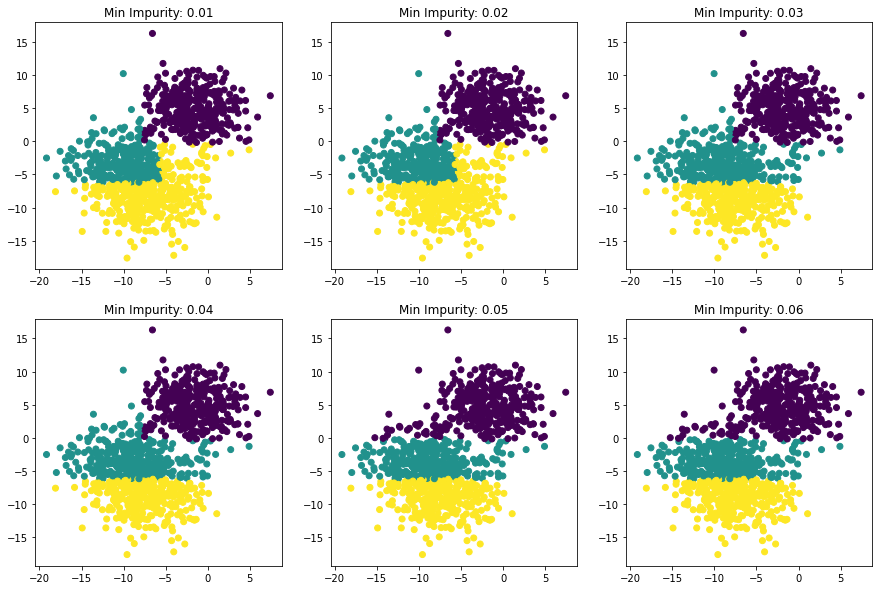

In [11]:
def plot_imp(d,x,y):
    model = DecisionTreeClassifier(min_impurity_decrease=d)
    model.fit(x, y)
    yp = model.predict(x)

    # Plot the results
    plt.scatter(x[:, 0], x[:, 1], c=yp)


plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plot_imp(((i + 1) / 100.0),X,y)
    plt.title("Min Impurity: {}".format(((i + 1) / 100.0)))
plt.show()